<a href="https://colab.research.google.com/github/sushma786/DS-MAJOR-PROJECT-COVID-19/blob/main/covid_19_pandemics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/owid-covid-data.csv")

FileNotFoundError: ignored

In [ ]:
pip install fbprophet

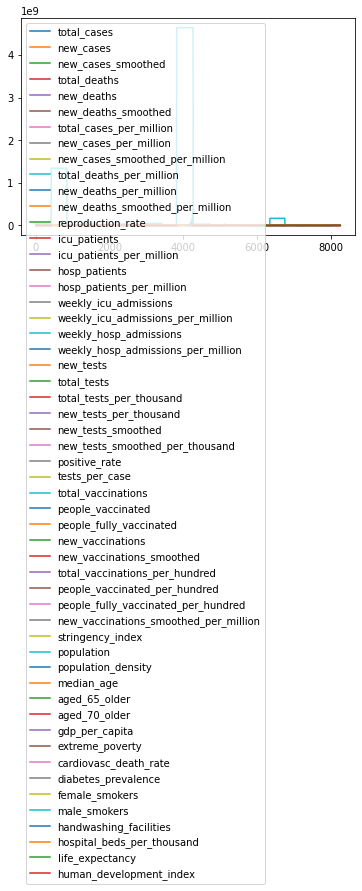

In [ ]:
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet

data.plot()


In [ ]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [ ]:
print('mindate:',data.date.min(),
      'maxdate:',data.date.max())

mindate: 2020-01-01 maxdate: 2021-04-14


In [ ]:
data.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

In [ ]:
df=data[['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases','total_deaths', 'new_deaths']]
df.loc[0:30,:]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,NaN,NaN
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,NaN,NaN
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,NaN,NaN


In [ ]:
# which country/state is having highest number of cases?

import plotly.express as px

In [ ]:
  high_cases = pd.DataFrame(df.groupby('location')['total_cases'].sum().nlargest(1).sort_values(ascending = False))
fig1 = px.scatter(high_cases, x = high_cases.index, y = 'total_cases', size = 'total_cases', size_max = 50,
                color = high_cases.index, title = 'highest number of Cases Countries')
fig1.show()

In [ ]:
 #which country/state is having lowest number of cases?
 
low_cases = pd.DataFrame(df.groupby('location')['total_cases'].sum().nsmallest(1).sort_values(ascending = False))
fig2 = px.scatter(high_cases, x = low_cases.index, y = 'total_cases', size = 'total_cases', size_max = 50,
                color = low_cases.index, title = 'lowest number of Cases Countries')
fig2.show()

In [ ]:
   # which country/state is having highest number of deaths?


high_death = pd.DataFrame(df.groupby('location')['total_deaths'].sum().nlargest(2).sort_values(ascending = False))
fig3 = px.bar(high_death, x = high_death.index, y = 'total_deaths', height = 600, color = 'total_deaths', orientation = 'h',
            color_continuous_scale = ['deepskyblue','red'], title = 'highest number of deaths Countries')
fig3.show()

In [ ]:
# which country/state is having lowest number of deaths?


low_death = pd.DataFrame(df.groupby('location')['total_deaths'].sum().nsmallest(2).sort_values(ascending = False))
fig4 = px.bar(low_death, x = low_death.index, y = 'total_deaths', height = 600, color = 'total_deaths', orientation = 'h',
            color_continuous_scale = ['deepskyblue','red'], title = 'lowest number of deaths Countries')
fig4.show()